Bit Error Rate (BER): 0.000000


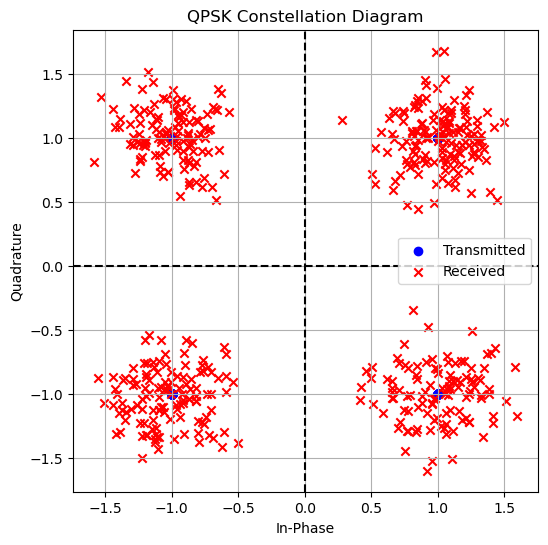

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# QPSK modulation function
def qpsk_modulation(bits):
    symbols = []
    for i in range(0, len(bits), 2):
        real = 2 * bits[i] - 1
        imag = 2 * bits[i+1] - 1
        symbols.append(complex(real, imag))
    return symbols

# QPSK demodulation function
def qpsk_demodulation(symbols):
    bits = []
    for s in symbols:
        bits.append(1 if s.real > 0 else 0)
        bits.append(1 if s.imag > 0 else 0)
    return bits

# Generate random binary data (bits)
num_bits = 1000
bits = np.random.randint(0, 2, num_bits)

# QPSK modulation
modulated_symbols = qpsk_modulation(bits)

# Add noise (optional)
snr_dB = 10  # Signal-to-noise ratio in dB
snr_linear = 10**(snr_dB / 10.0)  # Convert SNR from dB to linear scale
noise_power = 0.5 / snr_linear
noise = np.sqrt(noise_power) * (np.random.randn(len(modulated_symbols)) + 1j * np.random.randn(len(modulated_symbols)))
received_symbols = modulated_symbols + noise

# QPSK demodulation
demodulated_bits = qpsk_demodulation(received_symbols)

# Calculate bit error rate (BER)
ber = np.sum(bits != demodulated_bits) / num_bits

print(f"Bit Error Rate (BER): {ber:.6f}")

# Plot the constellation diagram
plt.figure(figsize=(6, 6))
plt.scatter(np.real(modulated_symbols), np.imag(modulated_symbols), label='Transmitted', color='b')
plt.scatter(np.real(received_symbols), np.imag(received_symbols), label='Received', color='r', marker='x')
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')
plt.xlabel('In-Phase')
plt.ylabel('Quadrature')
plt.title('QPSK Constellation Diagram')
plt.legend()
plt.grid(True)
plt.show()
